In [78]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)

In [4]:
subway_station = pd.read_csv('./data/subway/서울시 지하철호선별 역별 승하차 인원 정보.csv',encoding="EUC-KR")
subway_station.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210601,3호선,신사,28955,30583,20210604
1,20210601,3호선,잠원,4780,4656,20210604
2,20210601,3호선,고속터미널,33986,32532,20210604
3,20210601,3호선,교대(법원.검찰청),14136,9362,20210604
4,20210601,3호선,남부터미널(예술의전당),27604,28821,20210604


In [6]:
len(subway_station['역명'].unique())

520

In [19]:
subway_pos = pd.read_csv('./data/subway/subway_crd_line_info-main/지하철역_좌표.csv',encoding="EUC-KR")
subway_pos

,역이름,y,x
0,가락시장,37.492522,127.118234
1,종로3가,37.571607,126.991806
2,오금,37.502162,127.128111
3,동대문,37.571420,127.009745
4,동대문역사문화공원,37.565138,127.007896
...,...,...,...
584,동백,37.269043,127.152716
585,초당,37.260752,127.159443
586,삼가,37.242115,127.168075
587,시청·용인대,37.239151,127.178406


In [58]:
# inner join 진행 시 서로에게 없는 역들은 정보가 사라진다.
# join 진행 시 결측치들을 찾아보자.

ss = set(subway_station['역명'])
sp = set(subway_pos['역명'])
only_ss = ss-sp # subway_station에만 있는 역이름들이다.
only_sp = sp-ss # subway_pos에만 있는 역이름들이다.
display(len(only_ss))
display(len(only_sp))
display(len(ss & sp))
display(len(ss | sp))

79

148

441

668

In [21]:
subway_pos = subway_pos.rename(columns={'역이름':'역명'})

In [22]:
subway_pos.columns

Index(['역명', 'y', 'x'], dtype='object')

6월 한달 간의 지하철 역별 이용객 수이다.

In [68]:
subway_station_data1 = subway_station.merge(subway_pos,how='right',left_on='역명',right_on='역명')
display(subway_station_data1)
# 좌표는 있으나 승객 정보가 없는 경우이다.
# 차후에 데이터를 채워넣던가 해야할듯 싶다.
# display(only_sp)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,y,x
0,20210601.0,3호선,가락시장,8884.0,8813.0,20210604.0,37.492522,127.118234
1,20210601.0,8호선,가락시장,7463.0,8238.0,20210604.0,37.492522,127.118234
2,20210602.0,8호선,가락시장,7553.0,8392.0,20210605.0,37.492522,127.118234
3,20210602.0,3호선,가락시장,8990.0,8720.0,20210605.0,37.492522,127.118234
4,20210603.0,3호선,가락시장,8699.0,8484.0,20210606.0,37.492522,127.118234
...,...,...,...,...,...,...,...,...
15146,NaN,NaN,동백,NaN,NaN,NaN,37.269043,127.152716
15147,NaN,NaN,초당,NaN,NaN,NaN,37.260752,127.159443
15148,NaN,NaN,삼가,NaN,NaN,NaN,37.242115,127.168075
15149,NaN,NaN,시청·용인대,NaN,NaN,NaN,37.239151,127.178406


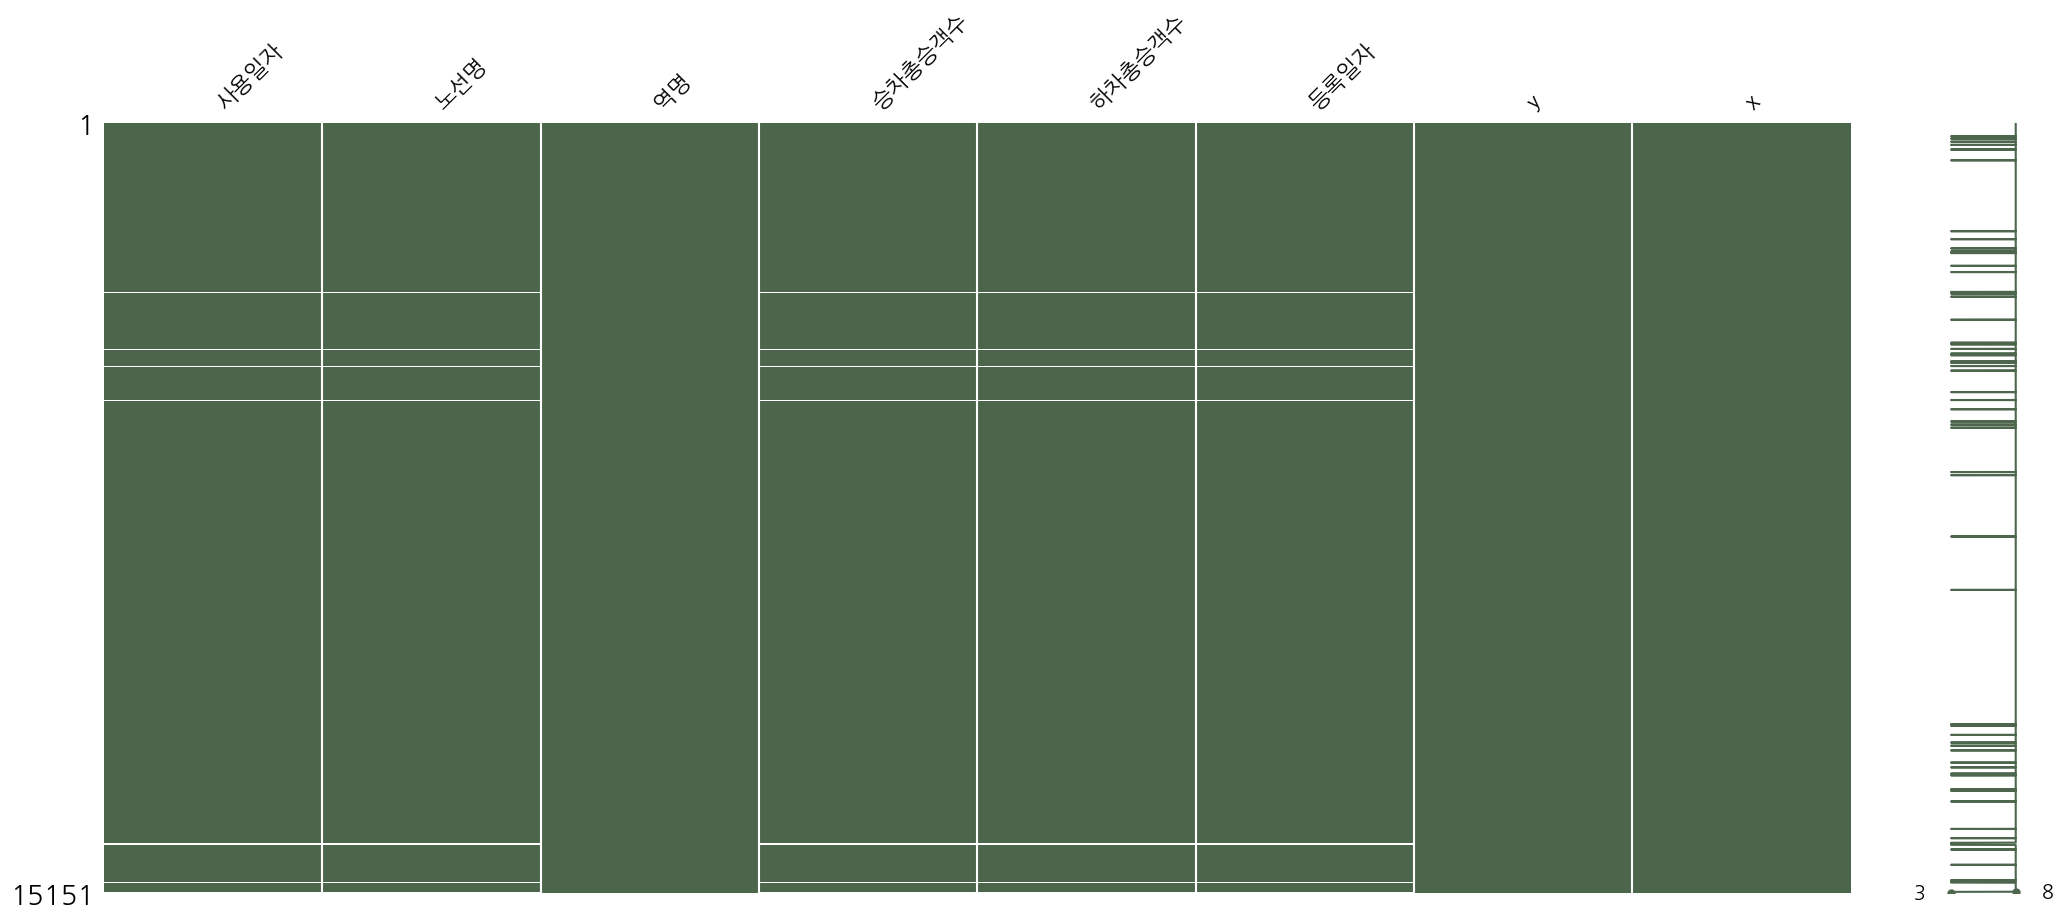

In [81]:
msno.matrix(df=subway_station_data1,color=(0.3,0.4,0.3))
plt.show()

In [71]:
subway_station_data2 = subway_station.merge(subway_pos,how='left',left_on='역명',right_on='역명')
display(subway_station_data2)
# 승객 데이터는 있지만 좌표데이터가 없는 경우이다.
# display(only_ss)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,y,x
0,20210601,3호선,신사,28955,30583,20210604,37.516334,127.020114
1,20210601,3호선,잠원,4780,4656,20210604,37.512759,127.011220
2,20210601,3호선,고속터미널,33986,32532,20210604,37.504810,127.004943
3,20210601,3호선,교대(법원.검찰청),14136,9362,20210604,NaN,NaN
4,20210601,3호선,남부터미널(예술의전당),27604,28821,20210604,NaN,NaN
...,...,...,...,...,...,...,...,...
18030,20210630,1호선,서울역,42545,39641,20210703,NaN,NaN
18031,20210630,8호선,신흥,4343,4713,20210703,37.440918,127.147564
18032,20210630,분당선,망포,14451,13503,20210703,37.245795,127.057353
18033,20210630,분당선,매탄권선,5121,4907,20210703,37.252759,127.040566


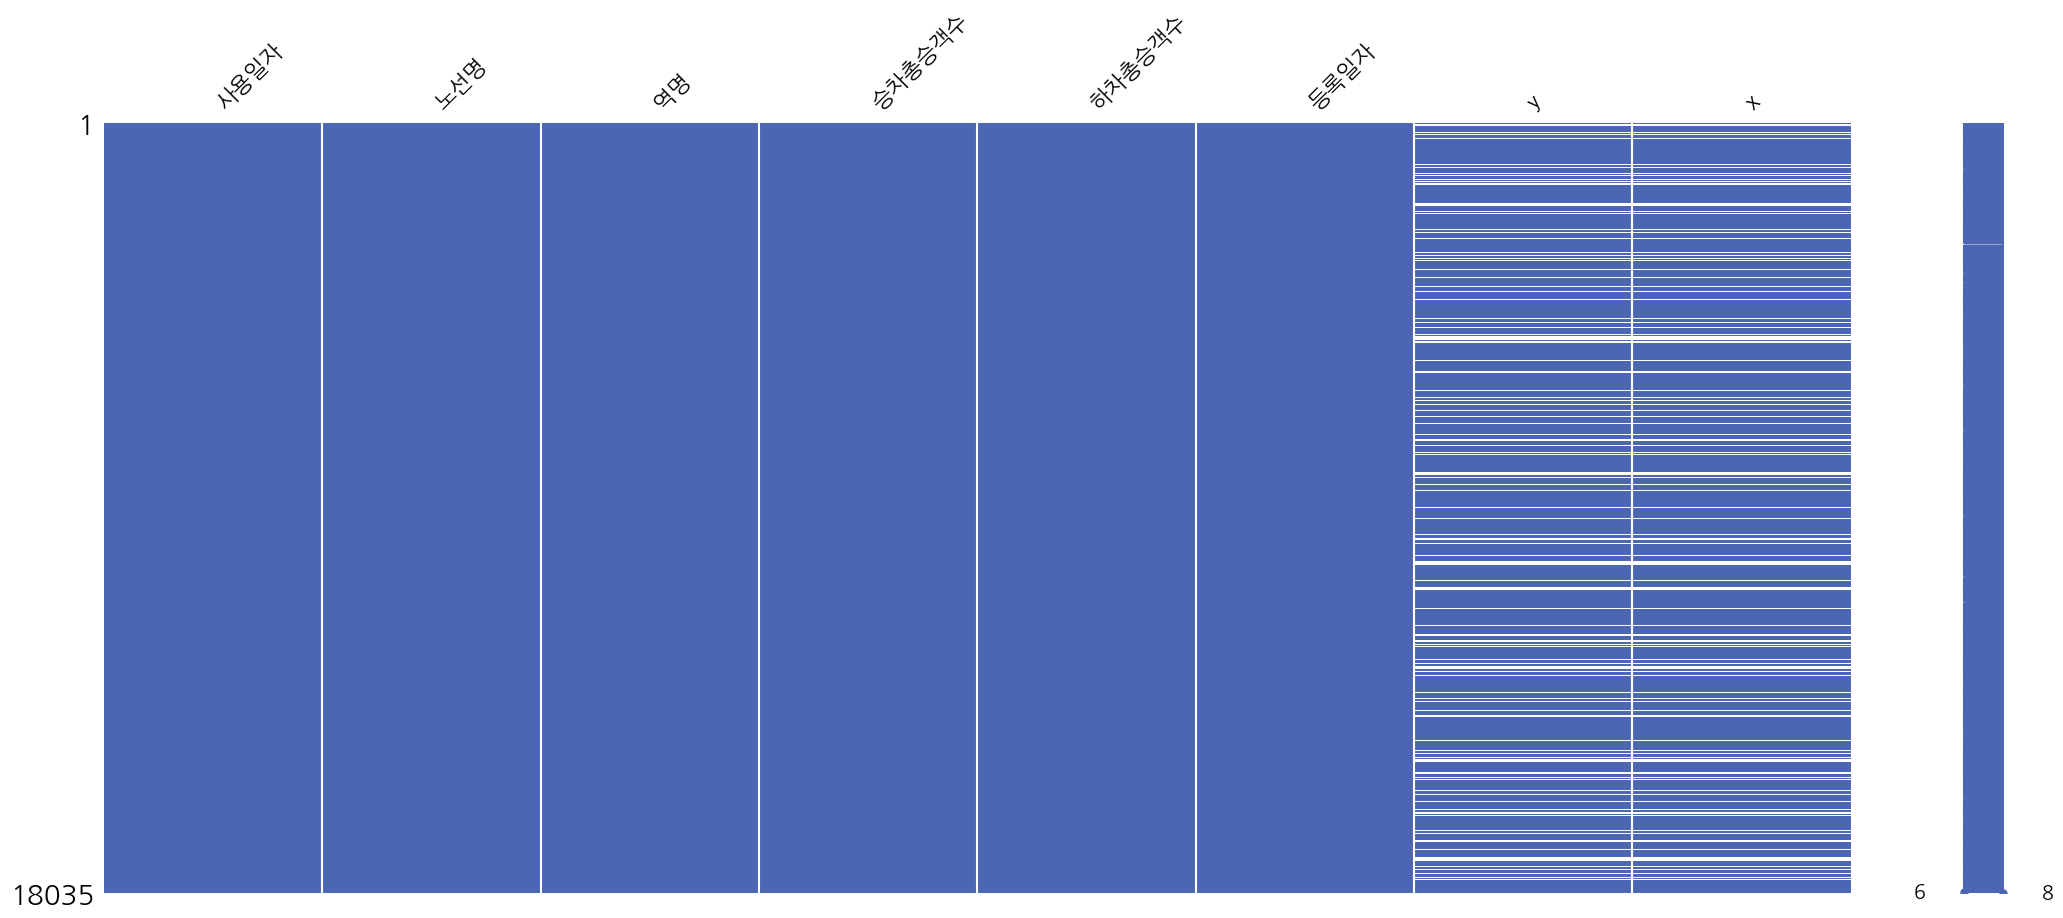

In [84]:
# 데이터는 있으나 좌표가 없는 데이터들은 좌표를 채워줄 수 있도록 한다.
msno.matrix(df=subway_station_data2,color=(0.3,0.4,0.7))
plt.show()

In [24]:
subway_station_sum = subway_station_data.groupby(['역명','x','y']).sum().reset_index()
subway_station_sum

,역명,x,y,사용일자,승차총승객수,하차총승객수,등록일자
0,가능,127.044213,37.748577,606318465,181348,174311,606318765
1,가락시장,127.118234,37.492522,1212636930,438397,454396,1212637530
2,가산디지털단지,126.882343,37.481072,1212636930,1625914,1702928,1212637530
3,가양,126.854456,37.561391,606318465,538978,524906,606318765
4,가오리,127.016792,37.641701,606318465,112317,110711,606318765
...,...,...,...,...,...,...,...
436,화전,126.868387,37.602888,606318465,47817,44087,606318765
437,화정,126.832650,37.634592,606318465,452213,463328,606318765
438,회기,127.057583,37.589460,606318465,656376,633886,606318765
439,회룡,127.046895,37.724846,606318465,340102,338206,606318765


In [38]:
subway_station_sum[['승차총승객수','하차총승객수']].agg(['min','max','mean','std'])

,승차총승객수,하차총승객수
min,1.982000e+03,1.821000e+03
max,2.209837e+06,2.171238e+06
mean,3.305747e+05,3.297557e+05
std,3.289736e+05,3.341271e+05


In [29]:
# Create a base map
# 지하철 역의 분포를 보여줌....

m_5 = folium.Map(location=[37.5665,126.9780], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()
for idx, row in subway_station_sum.iterrows():
    if not math.isnan(row['x']) and not math.isnan(row['y']):
        mc.add_child(Marker([row['y'], row['x']],popup=row['역명'],tooltip=row['승차총승객수']))
m_5.add_child(mc)

# r,g,b,lime
# gradient = {100000:'lime',200000:'skyblue',300000:'red',400000:'green',500000:'blue'}
# Add a heatmap to the base map
HeatMap(data=subway_station_sum[['y', 'x']], radius=10).add_to(m_5)

# Display the map
m_5